In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv ("C:/Users/USER/OneDrive/Desktop/AMOS/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_4770619.csv", skiprows=4)

In [3]:
# Extract the required data for the clustering
df_cluster = data.loc[data.index, ['2017', '2018', '2019']]
df_cluster = df_cluster.dropna().values

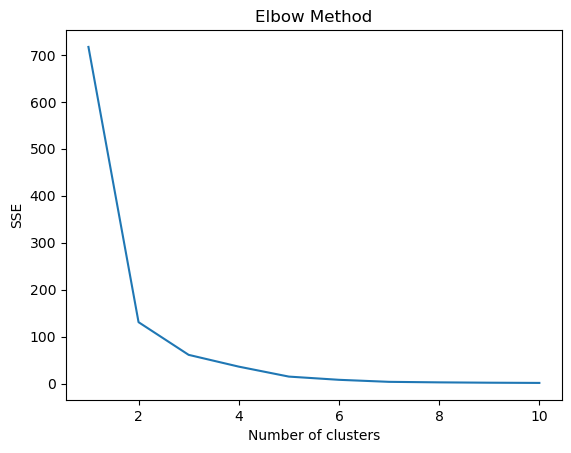

In [4]:
# Scale the data for better clustering results
scaler = StandardScaler()
df_cluster = scaler.fit_transform(df_cluster)


# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_cluster)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [5]:
# Perform the K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_cluster)
kmeans 

KMeans(n_clusters=3, random_state=0)

In [6]:
# Get the cluster labels
labels = kmeans.labels_

In [7]:
# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

In [8]:
# Print the results
print("Cluster labels:", labels)
print("Cluster centers:", cluster_centers)

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0]
Cluster centers: [[-0.23284584 -0.23290486 -0.23295444]
 [ 5.28939209  5.30409814  5.32396672]
 [ 2.57105075  2.56501989  2.55619599]]


In [9]:
#Silhouette Score
silhouette_avg = silhouette_score(df_cluster, labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.9243752752487334


In [10]:
# Convert the numpy array back to a pandas dataframe
df_cluster = pd.DataFrame(df_cluster)

# Create a new dataframe with the labels for each country
df_cluster['label'] = labels

# Create a dataframe with only the data points in the first cluster
df_label = df_cluster.loc[df_cluster['label'] == 0]
df_label.head(29)

,0,1,2,label
0,-0.173658,-0.176044,-0.173392,0
1,-0.313695,-0.312302,-0.311374,0
2,-0.265642,-0.264318,-0.261756,0
3,-0.309016,-0.308128,-0.306952,0
4,-0.313608,-0.312526,-0.311663,0
5,-0.314730,-0.313604,-0.312663,0
6,0.131776,0.114883,0.123211,0
7,-0.267492,-0.272391,-0.269125,0
8,-0.271751,-0.272442,-0.273923,0
9,-0.313553,-0.312386,-0.311353,0


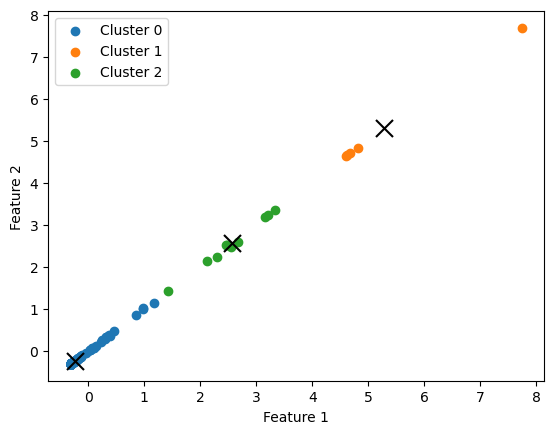

In [11]:
import matplotlib.pyplot as plt
# Plot each cluster
for i in range(3):
    cluster_data = df_cluster.loc[df_cluster['label'] == i]
    plt.scatter(cluster_data[0], cluster_data[1], label=f'Cluster {i}')
    plt.scatter(cluster_centers[i][0], cluster_centers[i][1], marker='x', s=150, c='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



In [12]:
# Descriptive statistics for each cluster
cluster_stats = df_cluster.groupby('label').describe()
print(cluster_stats)

# Comparison of the clusters with the entire dataset
overall_stats = df_cluster.describe()
print(overall_stats)

           0                                                              \
       count      mean       std       min       25%       50%       75%   
label                                                                      
0      224.0 -0.232846  0.215589 -0.314841 -0.314006 -0.309303 -0.267385   
1        5.0  5.289392  1.371808  4.600469  4.626140  4.671467  4.809785   
2       10.0  2.571051  0.574634  1.424202  2.340770  2.515520  3.038571   

                     1            ...                          2            \
            max  count      mean  ...       75%       max  count      mean   
label                             ...                                        
0      1.169676  224.0 -0.232905  ... -0.269666  1.130437  224.0 -0.232954   
1      7.739098    5.0  5.304098  ...  4.837323  7.687049    5.0  5.323967   
2      3.338222   10.0  2.565020  ...  3.034980  3.340760   10.0  2.556196   

                                                                   
      

In [13]:
# Extract the required data for the clustering
df_growth = data.loc[data.index, ['1990', '2019']]
df_growth = df_growth.dropna()

In [14]:
# Select the columns using the column names
x = df_growth.loc[:, "1990"]
y = df_growth.loc[:, "2019"]

In [15]:
from scipy.optimize import curve_fit
from matplotlib import pyplot

In [16]:
# Define the exponential growth function
def exp_growth(x, a, b):
    return a * b ** x

In [17]:
# Fit the exponential growth model to the data
popt, pcov = curve_fit(exp_growth, x, y)

In [18]:
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 1560371.81825 * x + 1.00000


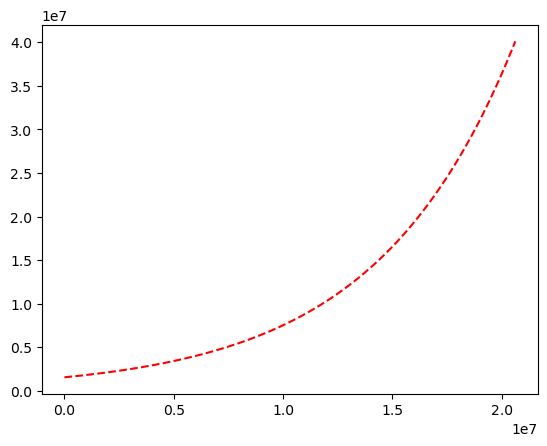

In [20]:
# fit a straight line to the economic data
from numpy import arange
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = exp_growth(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [22]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
# Get the best-fit parameters
a, b = popt

# Get the standard deviation of the best-fit parameters
a_std, b_std = np.sqrt(np.diag(pcov))

# Calculate the 95% confidence intervals
a_confint = norm.interval(0.95, loc=a, scale=a_std)
b_confint = norm.interval(0.95, loc=b, scale=b_std)

# Print the confidence intervals
print("a:", a_confint)
print("b:", b_confint)

a: (1213516.3920743186, 1907227.244418277)
b: (1.0000001458095649, 1.0000001690354963)
